In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("C:/Users/odela/Downloads")

In [8]:
data= pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [130]:
# Normalizar datos
from sklearn.preprocessing import normalize
data_scaled= normalize(data)
data_scaled

array([[1.11821406e-04, 1.67732109e-04, 7.08332695e-01, ...,
        1.19648904e-02, 1.49505220e-01, 7.48085205e-02],
       [1.25321880e-04, 1.87982820e-04, 4.42198253e-01, ...,
        1.10408576e-01, 2.06342475e-01, 1.11285829e-01],
       [1.24839188e-04, 1.87258782e-04, 3.96551681e-01, ...,
        1.50119124e-01, 2.19467293e-01, 4.89619296e-01],
       ...,
       [5.01633106e-05, 7.52449659e-05, 3.64461533e-01, ...,
        1.09606834e-02, 3.72236846e-01, 4.68274505e-02],
       [9.11309417e-05, 2.73392825e-04, 9.37737390e-01, ...,
        9.45939175e-02, 1.53099982e-02, 1.93653251e-01],
       [2.41225630e-04, 7.23676891e-04, 6.72295832e-01, ...,
        1.56796660e-02, 1.15064626e-01, 1.25437328e-02]])

In [132]:
data_scaled= pd.DataFrame(data_scaled, columns= data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


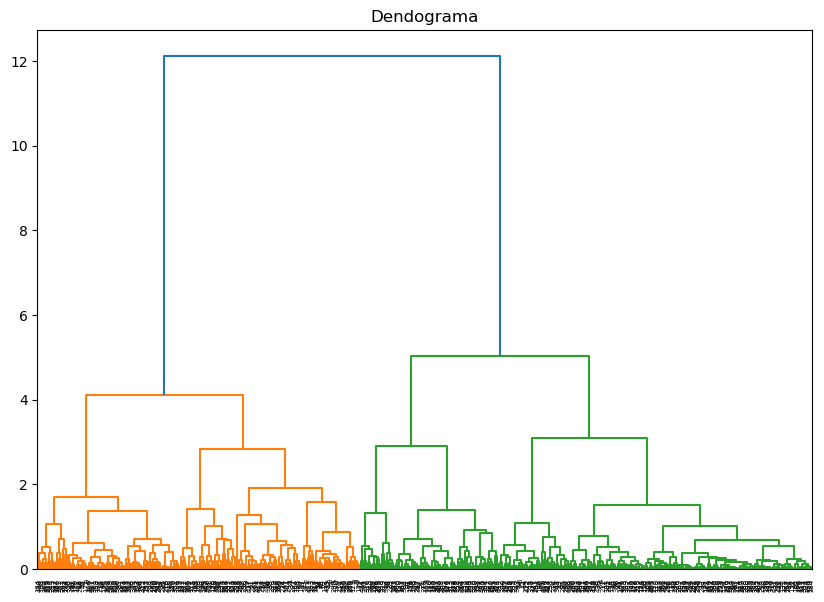

In [135]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendograma")
dend= shc.dendrogram(shc.linkage(data_scaled, method= "ward"))

In [136]:
# los colores son C0, C1 Y C2, C0 es el que agrupa todo y no cuenta, entonces sólo hay dos agrupaciones
print(dend["color_list"])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1

In [141]:
# Saber colores únicos para saber los grupos
colores_unicos= set(dend["color_list"])
colores_unicos

{'C0', 'C1', 'C2'}

In [143]:
# cantidad de grupos óptimo
num_clusters_óptimo= len(colores_unicos)-1
num_clusters_óptimo

2

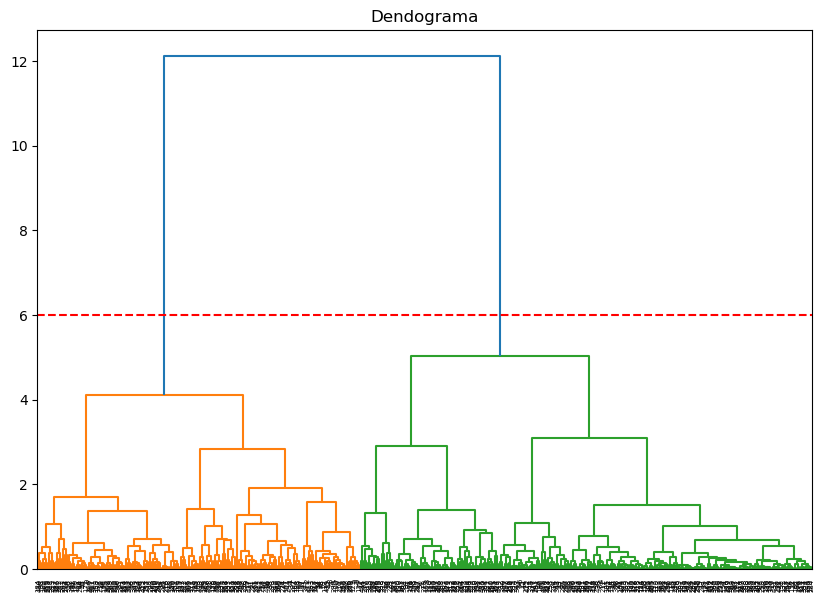

In [145]:
# Poner línea que pase por la cantidad de grupos cálculada
plt.figure(figsize=(10,7))
plt.title("Dendograma")
dend= shc.dendrogram(shc.linkage(data_scaled, method= "ward"))
plt.axhline(y=6, color="r", linestyle="--")

In [10]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [149]:
# Agregar columna para conocer a que grupo pertenecen

from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=2, metric= "euclidean", linkage="ward")
grupos= cluster.fit_predict(data_scaled)
grupos

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

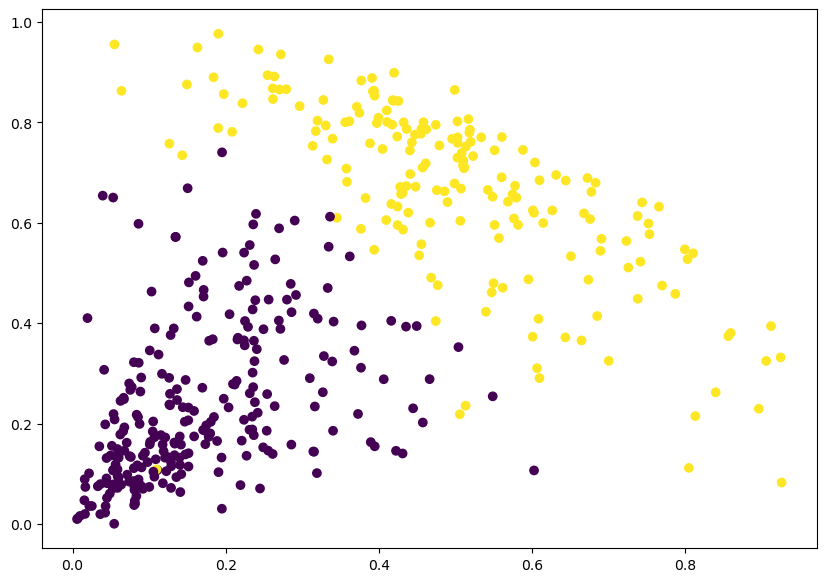

In [151]:
# c= cluster.labels_ para que divida los colores según su grupo
plt.figure(figsize=(10,7))
plt.scatter( data_scaled["Milk"],data_scaled["Grocery"], c=cluster.labels_)

In [153]:
# Separación de grupos mediante PCA

campos= data_scaled.values
print(campos)

[[1.11821406e-04 1.67732109e-04 7.08332695e-01 ... 1.19648904e-02
  1.49505220e-01 7.48085205e-02]
 [1.25321880e-04 1.87982820e-04 4.42198253e-01 ... 1.10408576e-01
  2.06342475e-01 1.11285829e-01]
 [1.24839188e-04 1.87258782e-04 3.96551681e-01 ... 1.50119124e-01
  2.19467293e-01 4.89619296e-01]
 ...
 [5.01633106e-05 7.52449659e-05 3.64461533e-01 ... 1.09606834e-02
  3.72236846e-01 4.68274505e-02]
 [9.11309417e-05 2.73392825e-04 9.37737390e-01 ... 9.45939175e-02
  1.53099982e-02 1.93653251e-01]
 [2.41225630e-04 7.23676891e-04 6.72295832e-01 ... 1.56796660e-02
  1.15064626e-01 1.25437328e-02]]


In [155]:
# Generar grupos eje x y y para poder graficar
from sklearn import decomposition
pca= decomposition.PCA(n_components=2)
pca.fit(campos)
campos= pca.transform(campos)
campos

array([[-3.40370496e-02, -1.80420878e-01],
       [-3.51057368e-01, -4.66441613e-02],
       [-3.05375430e-01,  5.55510662e-02],
       [ 3.83677396e-01,  1.61789121e-01],
       [ 3.18591263e-01, -7.69700156e-02],
       [-3.73478459e-02, -1.19851588e-01],
       [ 1.20176243e-01, -2.43275779e-01],
       [-2.39772413e-01, -1.04149634e-01],
       [-1.65698845e-01, -1.87946102e-01],
       [-5.68883753e-01, -1.09187885e-01],
       [-5.50490278e-01,  8.66514506e-02],
       [ 3.80404330e-01, -1.63301699e-01],
       [ 2.16997115e-01, -2.19645753e-01],
       [ 4.15793549e-02, -1.73397544e-01],
       [ 1.33933983e-01, -2.36377213e-01],
       [ 3.35298752e-01, -2.30915370e-01],
       [-7.26283916e-01, -7.33583822e-02],
       [-5.14896222e-02,  7.05034152e-03],
       [ 1.39371504e-01, -1.51057486e-01],
       [-1.64608998e-01, -2.12412480e-01],
       [ 3.33835807e-01, -1.80358027e-01],
       [ 3.23995148e-01,  2.39147842e-01],
       [ 4.98705749e-01,  4.14682390e-02],
       [-2.

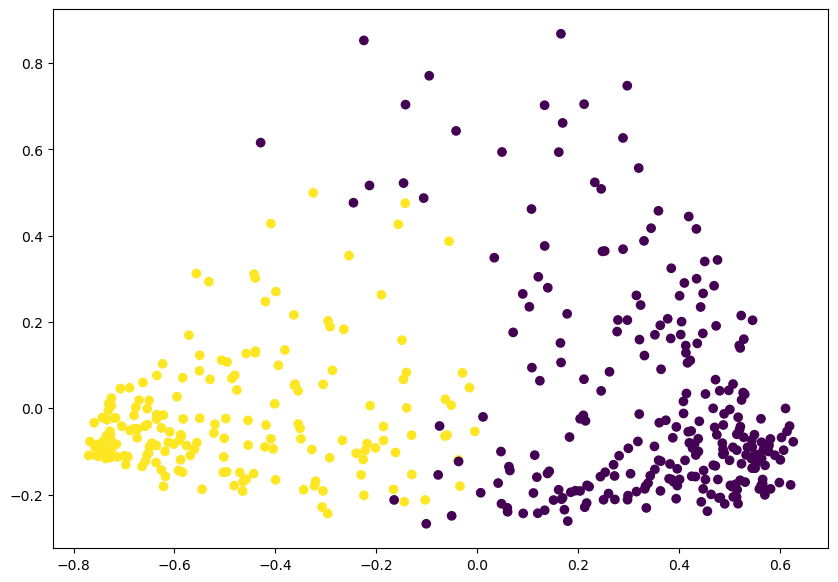

In [157]:
plt.figure(figsize=(10,7))
plt.scatter( campos[:,0], campos[:,1], c= cluster.labels_)

In [83]:
dataframe= pd.DataFrame(grupos,columns= ["Grupo"])
dataframe

,Grupo
0,1
1,1
2,1
3,0
4,0
...,...
435,0
436,0
437,1
438,0


In [87]:
# Unir dataframe original con el grupo de cada renglón
dataframe2= pd.concat([data, dataframe], axis=1, join="inner")
dataframe2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Grupo
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


In [91]:
# quitar limitante para poder ver renglones
pd.options.display.max_rows= None
dataframe2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Grupo
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,0
7,2,3,7579,4956,9426,1669,3321,2566,1
8,1,3,5963,3648,6192,425,1716,750,1
9,2,3,6006,11093,18881,1159,7425,2098,1


# Análisis de casos de estudiantes

In [159]:
data= pd.DataFrame(np.array([[7,6.5,9.2,8.6,8],
                             [7.5,9.4,7.3,7,7],
                             [7.6,9.2,8,8,7.5],
                             [5,6.5,6.5,7,9],
                             [6,6,7.8,8.9,7.3],
                             [7.8,9.6,7.7,8,6.5],
                             [6.3,6.4,8.2,9,7.2],
                             [7.9,9.7,7.5,8,6],
                             [6,6,6.5,5.5,8.7],
                             [6.8,7.2,8.7,9,7]]),
                   columns=["Matemáticas", "ciencias","español","historia", "EdFísica"])
data
                    

,Matemáticas,ciencias,español,historia,EdFísica
0,7.0,6.5,9.2,8.6,8.0
1,7.5,9.4,7.3,7.0,7.0
2,7.6,9.2,8.0,8.0,7.5
3,5.0,6.5,6.5,7.0,9.0
4,6.0,6.0,7.8,8.9,7.3
5,7.8,9.6,7.7,8.0,6.5
6,6.3,6.4,8.2,9.0,7.2
7,7.9,9.7,7.5,8.0,6.0
8,6.0,6.0,6.5,5.5,8.7
9,6.8,7.2,8.7,9.0,7.0


In [161]:
# Normalizar datos
from sklearn.preprocessing import normalize
data_scaled= normalize(data)
data_scaled

array([[0.39512724, 0.36690387, 0.51931009, 0.48544204, 0.45157399],
       [0.4360023 , 0.54645622, 0.42437557, 0.40693548, 0.40693548],
       [0.42050606, 0.50903365, 0.44263796, 0.44263796, 0.41497309],
       [0.32308533, 0.42001094, 0.42001094, 0.45231947, 0.5815536 ],
       [0.36834085, 0.36834085, 0.47884311, 0.54637226, 0.44814804],
       [0.43703137, 0.53788477, 0.43142841, 0.44823731, 0.36419281],
       [0.37600718, 0.38197555, 0.48940617, 0.53715311, 0.42972249],
       [0.44671284, 0.54849551, 0.42409446, 0.45236743, 0.33927557],
       [0.40434535, 0.40434535, 0.4380408 , 0.37064991, 0.58630076],
       [0.39015437, 0.41310462, 0.49916809, 0.51638078, 0.4016295 ]])

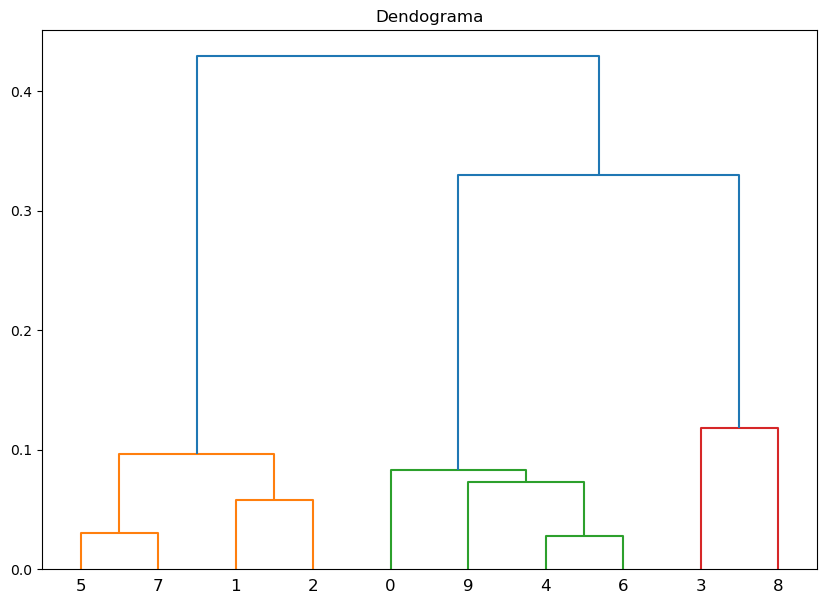

In [163]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendograma")
dend= shc.dendrogram(shc.linkage(data_scaled, method= "ward"))

In [165]:
colores_unicos= set(dend["color_list"])
num_clusters_óptimo= len(colores_unicos)-1
num_clusters_óptimo

3

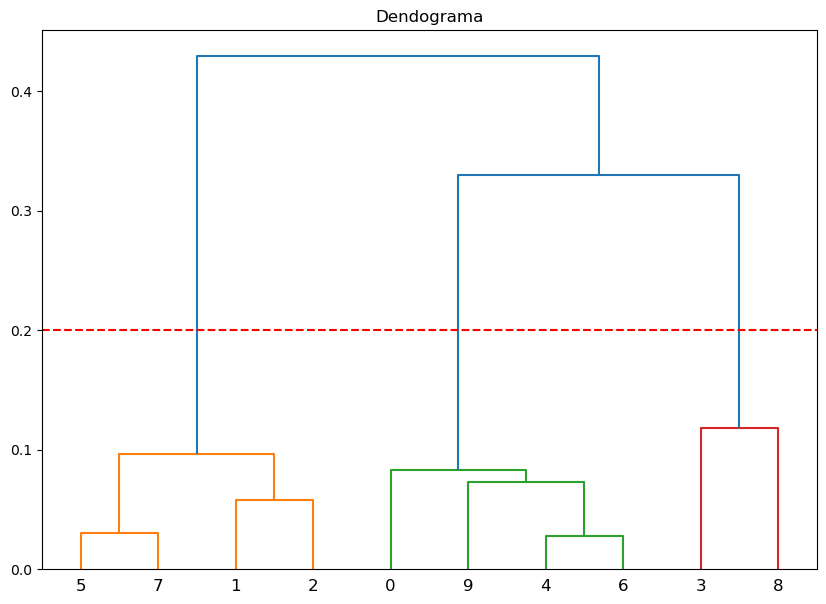

In [167]:
# Poner línea que pase por la cantidad de grupos cálculada
plt.figure(figsize=(10,7))
plt.title("Dendograma")
dend= shc.dendrogram(shc.linkage(data_scaled, method= "ward"))
plt.axhline(y=.2, color="r", linestyle="--")

In [169]:
# Generar eje x y y con los campos de los grupos creados
campos=data_scaled
from sklearn import decomposition
pca= decomposition.PCA(n_components=2)
pca.fit(campos)
campos= pca.transform(campos)
campos

array([[-0.07537384,  0.05649076],
       [ 0.11233306, -0.06156361],
       [ 0.06937082, -0.02395785],
       [-0.12493186, -0.09133353],
       [-0.08285196,  0.08431667],
       [ 0.12725973, -0.00431553],
       [-0.05987387,  0.08818057],
       [ 0.15385473,  0.00668172],
       [-0.1045932 , -0.13852098],
       [-0.01519363,  0.08402179]])

In [171]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=3, metric= "euclidean", linkage="ward")
grupos= cluster.fit_predict(data_scaled)
grupos

array([2, 1, 1, 0, 2, 1, 2, 1, 0, 2], dtype=int64)

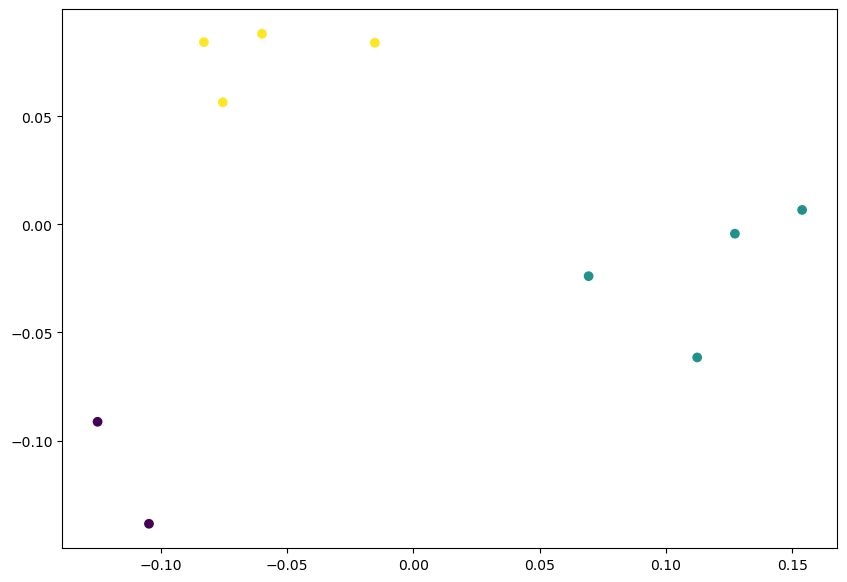

In [173]:
plt.figure(figsize=(10,7))
plt.scatter( campos[:,0], campos[:,1], c= cluster.labels_)

In [175]:
dataframe= pd.DataFrame(grupos, columns=["grupo"])
dataframe

,grupo
0,2
1,1
2,1
3,0
4,2
5,1
6,2
7,1
8,0
9,2


In [177]:
dataframe2= pd.concat([data,dataframe],axis=1 , join="inner")
dataframe2

,Matemáticas,ciencias,español,historia,EdFísica,grupo
0,7.0,6.5,9.2,8.6,8.0,2
1,7.5,9.4,7.3,7.0,7.0,1
2,7.6,9.2,8.0,8.0,7.5,1
3,5.0,6.5,6.5,7.0,9.0,0
4,6.0,6.0,7.8,8.9,7.3,2
5,7.8,9.6,7.7,8.0,6.5,1
6,6.3,6.4,8.2,9.0,7.2,2
7,7.9,9.7,7.5,8.0,6.0,1
8,6.0,6.0,6.5,5.5,8.7,0
9,6.8,7.2,8.7,9.0,7.0,2


In [179]:
dataframe2.index= ["Lucia", "Pedro", "Ines", "Lucia", "Andrea", "Ana", "Carlos", "José", "Sonia", "María"]
dataframe2

,Matemáticas,ciencias,español,historia,EdFísica,grupo
Lucia,7.0,6.5,9.2,8.6,8.0,2
Pedro,7.5,9.4,7.3,7.0,7.0,1
Ines,7.6,9.2,8.0,8.0,7.5,1
Lucia,5.0,6.5,6.5,7.0,9.0,0
Andrea,6.0,6.0,7.8,8.9,7.3,2
Ana,7.8,9.6,7.7,8.0,6.5,1
Carlos,6.3,6.4,8.2,9.0,7.2,2
José,7.9,9.7,7.5,8.0,6.0,1
Sonia,6.0,6.0,6.5,5.5,8.7,0
María,6.8,7.2,8.7,9.0,7.0,2
